# Task 2

Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

Sample Dataset :- https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')

In [ ]:
data = pd.read_csv('AB_NYC_2019.csv', index_col=0)

In [ ]:
data.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


##General analysis of the dataset

In [ ]:
data.shape

(48895, 15)

In [ ]:
data.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 2539 to 36487245
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month         

In [ ]:
data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
data.isna().sum()

name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

##Handling outliers in data analysis

In [ ]:
# checking price
data['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

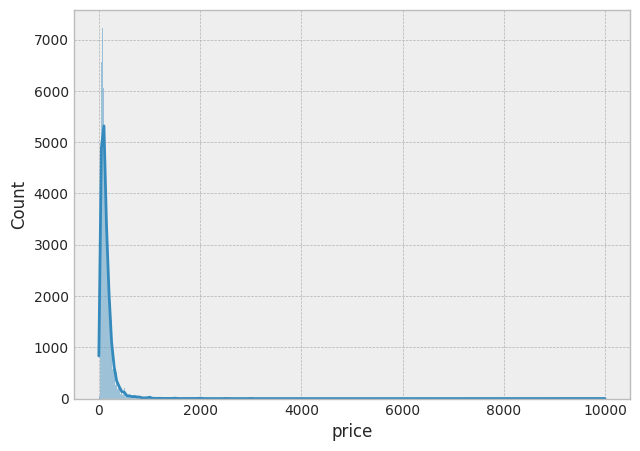

In [ ]:
sns.histplot(data['price'], kde=True, bins=500)

In [ ]:
# using the 1.5 * IQR rule to clean up the outliers in the price column
q1 = data.price.quantile(0.25)
q3 = data.price.quantile(0.75)
iqr = q3 - q1
print(f'Q1 - {q1}, Q3 - {q3}, IQR - {iqr}')

Q1 - 69.0, Q3 - 175.0, IQR - 106.0


In [ ]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(lower_bound, upper_bound)

-90.0 334.0


In [ ]:
data = data.loc[(data['price'] < upper_bound) & (data['price'] > lower_bound) & (data['price'] != 0)]
data.shape

(45907, 15)

<Axes: xlabel='price', ylabel='Count'>

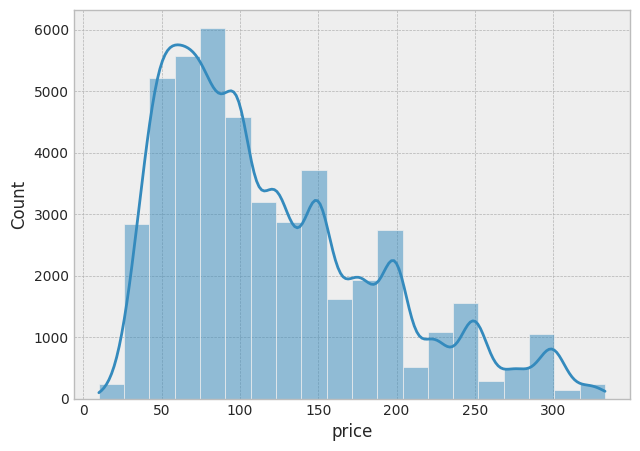

In [ ]:
sns.histplot(data['price'], kde=True, bins=20)

In [ ]:
# checking minimum_nights
data['minimum_nights'].describe()

count    45907.00000
mean         6.93587
std         19.85941
min          1.00000
25%          1.00000
50%          2.00000
75%          5.00000
max       1250.00000
Name: minimum_nights, dtype: float64

<Axes: xlabel='minimum_nights', ylabel='Count'>

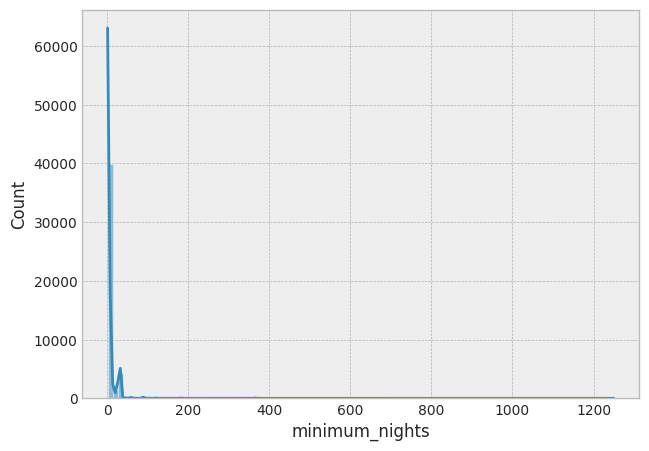

In [ ]:
sns.histplot(data['minimum_nights'], kde=True, bins=100)

In [ ]:
# using a different approach to outlier removal, using 4 standard deviation to remove outliers
std_data = data.minimum_nights.std()
std_data

19.859410453372806

In [ ]:
data = data.loc[(data['minimum_nights'] < data['minimum_nights'].median() + 4 * std_data) & (data['minimum_nights'] > data['minimum_nights'].median() - 4 * std_data)]
data.shape

(45635, 15)

<Axes: xlabel='minimum_nights', ylabel='Count'>

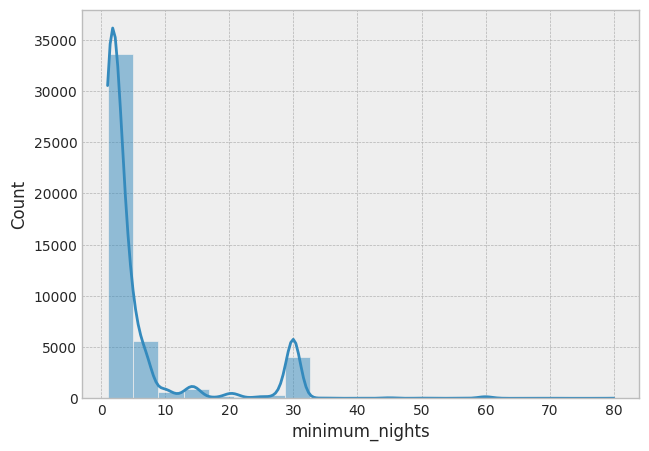

In [ ]:
sns.histplot(data['minimum_nights'], kde=True, bins=20)

##Deletion/processing of missing values

In [ ]:
data.isna().sum()

name                                15
host_id                              0
host_name                           21
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       8879
reviews_per_month                 8879
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [ ]:
data.name.fillna('No_name', inplace=True)

In [ ]:
data.host_name.fillna('No_hostname', inplace=True)

In [ ]:
data[data.last_review.isna()]['number_of_reviews'].unique()

array([0])

In [ ]:
# we can see that there are missing data in the last_review and reviews_per_month columns
# for those apartments that have no reviews at all,
# so we will replace the empty values with "no reviews"
data.last_review.fillna('No reviews', inplace=True)
data.reviews_per_month.fillna(0, inplace=True)

In [ ]:
data.isna().sum()

name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

##Visualizing data and finding connections

In [ ]:
data.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,No reviews,0.00,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


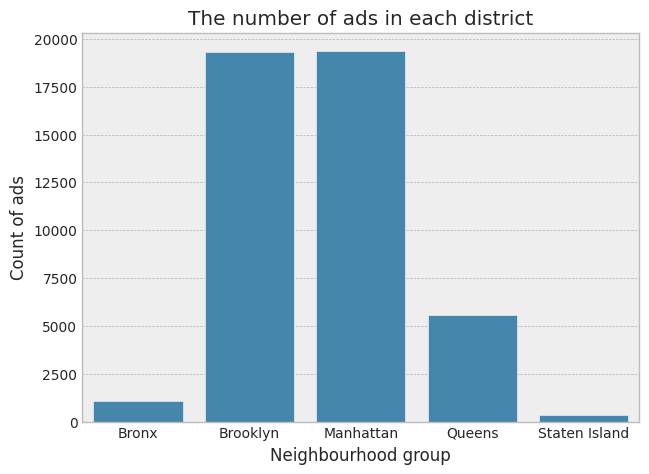

In [ ]:
# checking which area has the most housing ads
sns.barplot(data.groupby('neighbourhood_group').size())
plt.title('The number of ads in each district')
plt.xlabel('Neighbourhood group')
plt.ylabel('Count of ads');

In [ ]:
popular_areas = data.groupby('neighbourhood_group').size().sort_values(ascending=False)[:2]
print(f'Two of the most popular regions in terms of housing: {popular_areas.index[0]}, {popular_areas.index[1]}')

Two of the most popular regions in terms of housing: Manhattan, Brooklyn


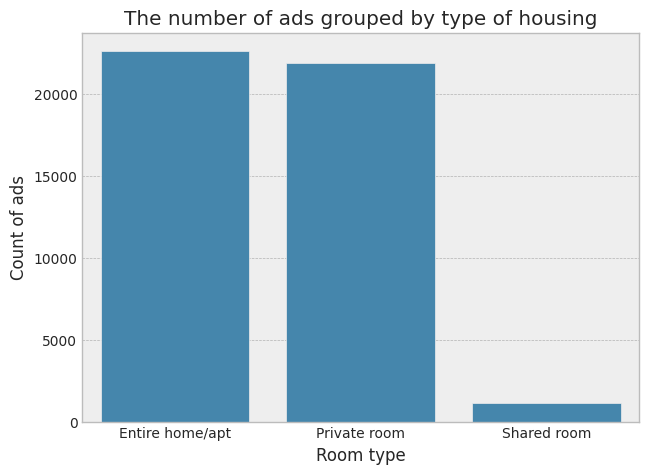

In [ ]:
# checking what type of housing is most popular
sns.barplot(data.groupby('room_type').size())
plt.title('The number of ads grouped by type of housing')
plt.xlabel('Room type')
plt.ylabel('Count of ads');

In [ ]:
roomtype = data.groupby('room_type').size().sort_values(ascending=False).index[0]
print(f'The most popular room type: {roomtype}')

The most popular room type: Entire home/apt


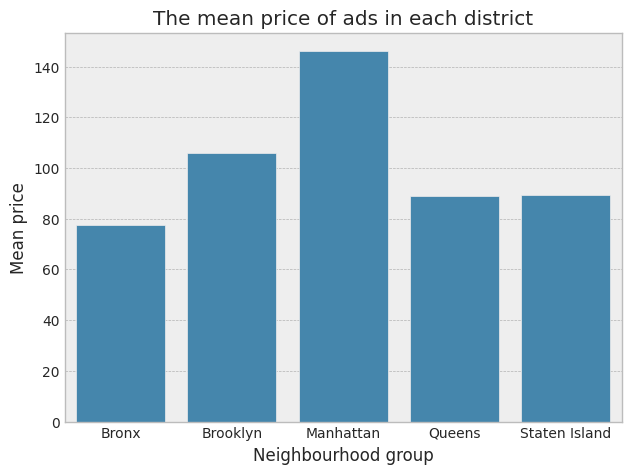

In [ ]:
# price analysis depending on the area
sns.barplot(data.groupby('neighbourhood_group').price.mean())
plt.title('The mean price of ads in each district')
plt.xlabel('Neighbourhood group')
plt.ylabel('Mean price');

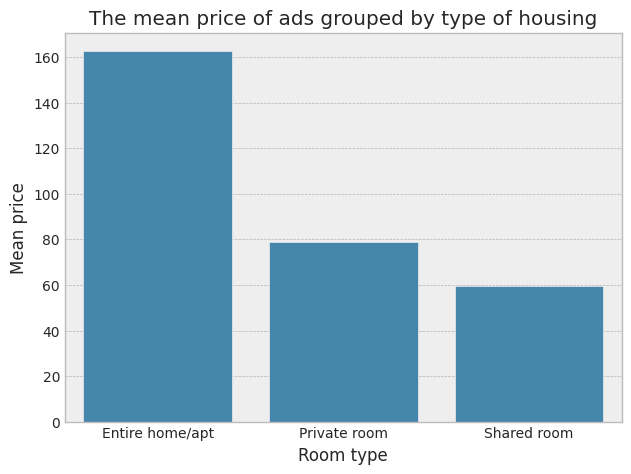

In [ ]:
# price analysis depending on the type of room
sns.barplot(data.groupby('room_type').price.mean())
plt.title('The mean price of ads grouped by type of housing')
plt.xlabel('Room type')
plt.ylabel('Mean price');

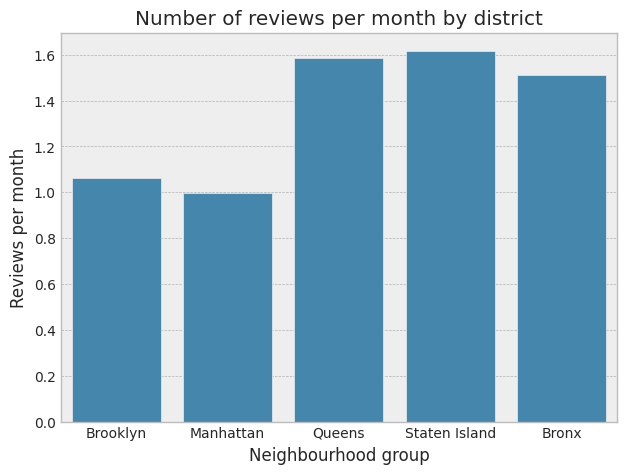

In [ ]:
# checking number of reviews per month by district
sns.barplot(data=data, x='neighbourhood_group', y='reviews_per_month', errorbar=None)
plt.title('Number of reviews per month by district')
plt.xlabel('Neighbourhood group')
plt.ylabel('Reviews per month');

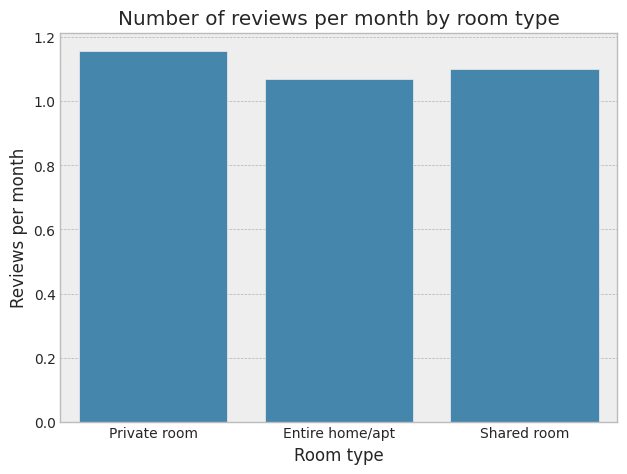

In [ ]:
# checking number of reviews per month by room type
sns.barplot(data=data, x='room_type', y='reviews_per_month', errorbar=None)
plt.title('Number of reviews per month by room type')
plt.xlabel('Room type')
plt.ylabel('Reviews per month');

##Correlation analysis

<ipython-input-499-8fdd069a6fbf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


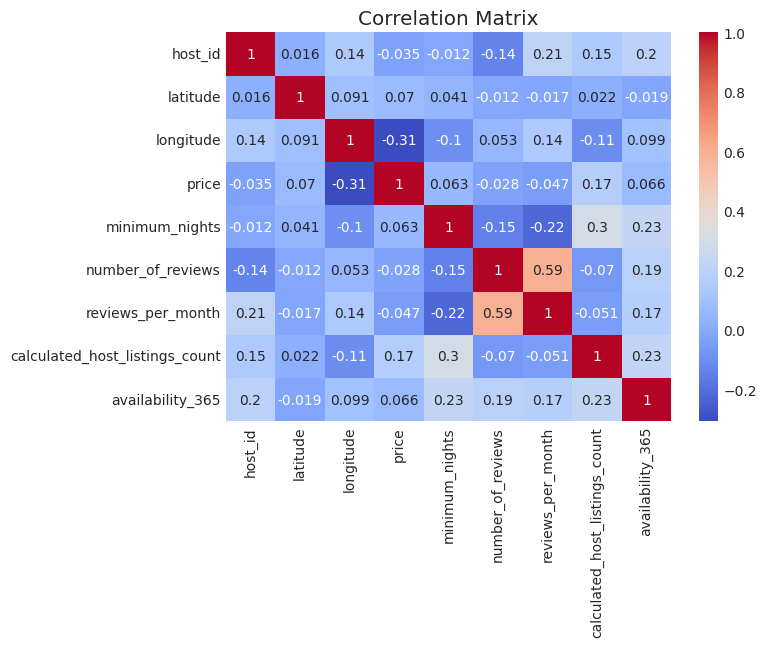

In [ ]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

1. Price correlation:
The price has a weak negative correlation with longitude, which means that there is a weak tendency for the price to decrease as the longitude increase.

2. Minimum number of nights:
The minimum number of nights has a weak positive correlation with calculated_host_listings_count and availability_365, which may indicate that hosts with more listings and more availability may set a higher minimum number of nights.

3. Correlation between numerical variables:
There is a weak correlation between number_of_reviews and reviews_per_month. This may be due to the fact that a higher number of reviews leads to a higher number of reviews per month.

##Analysis of the location of buildings with certain filters

In [ ]:
import folium

# displaying the location of the 10 most expensive buildings in manhattan
top_expensive_buildings = data[data['neighbourhood_group']=='Manhattan'].sort_values('price', ascending=False)[:10]
map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)
for index, row in top_expensive_buildings.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['name']).add_to(map)

map.save('map.html')

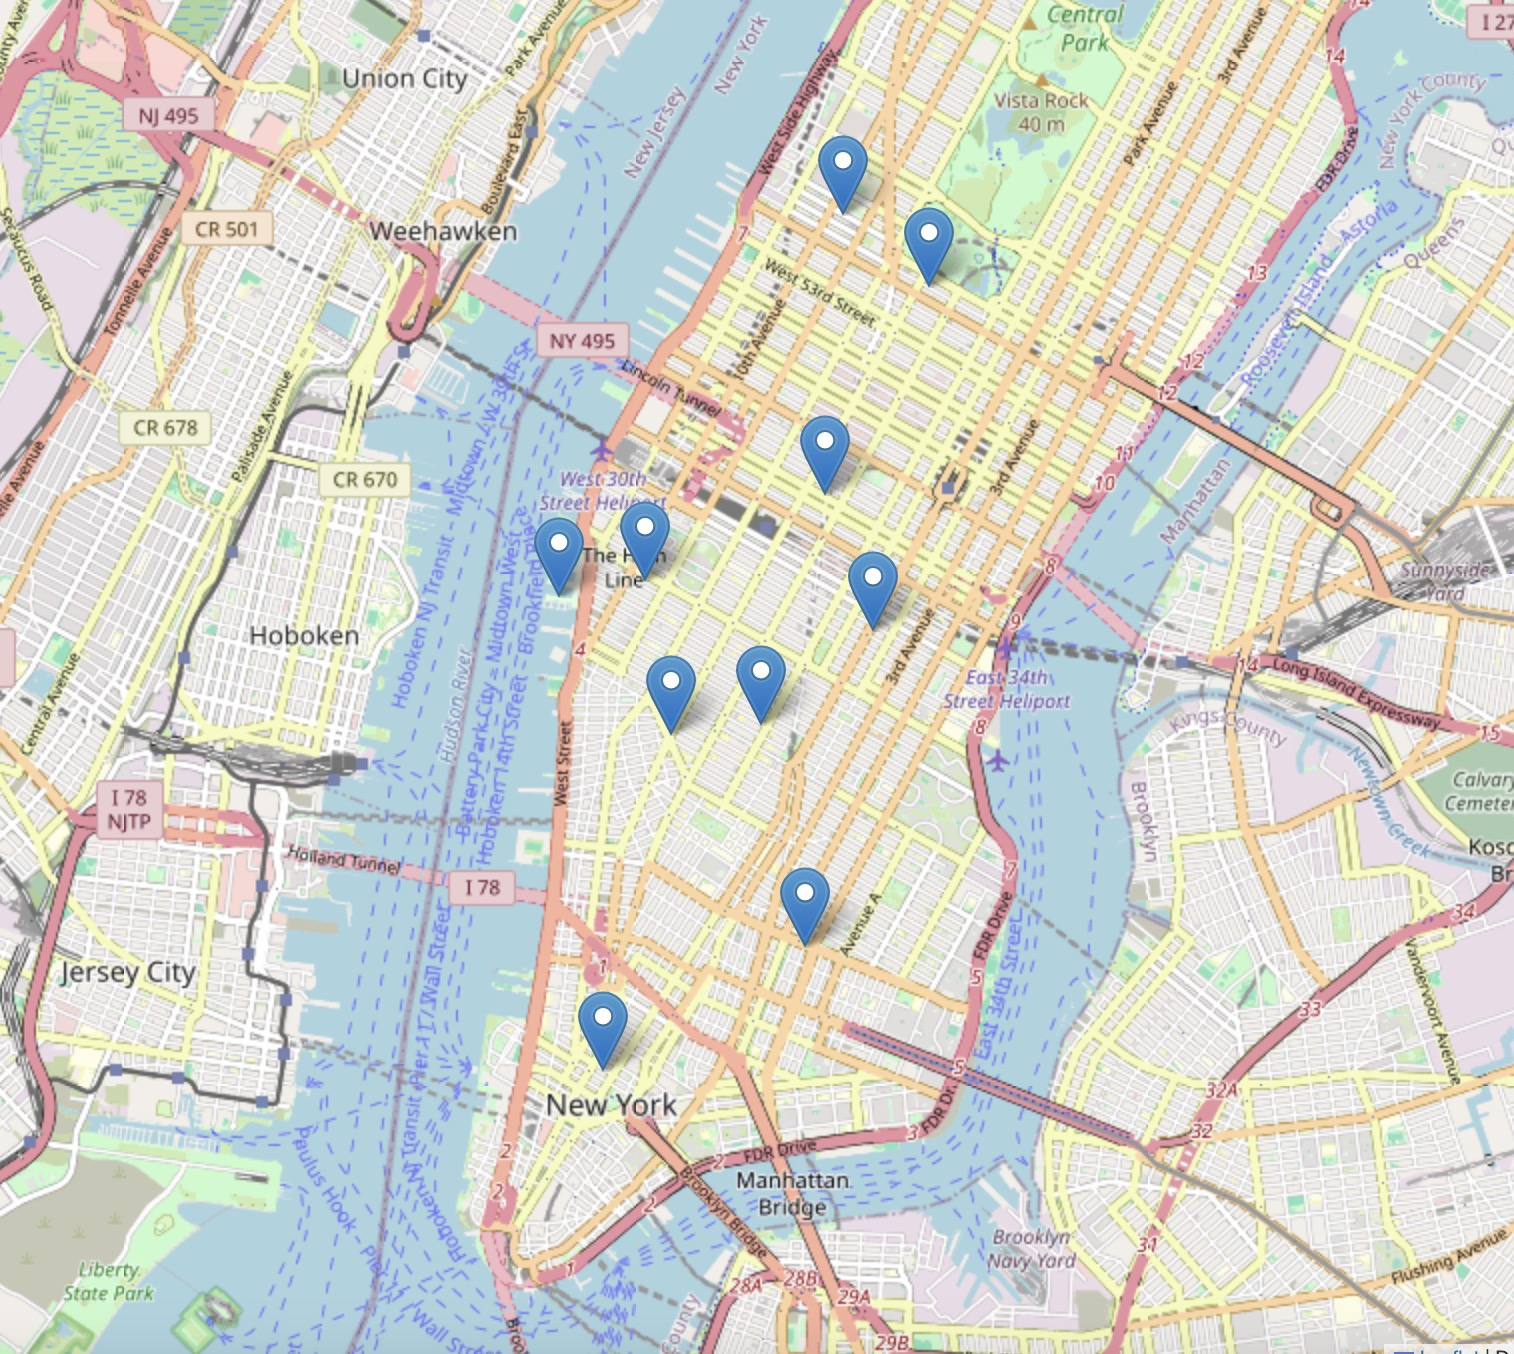

In [508]:
from IPython.display import Image
Image('map_result.jpeg')

## Analyzing the characteristics of the data and establishing their main relationships

In [511]:
# Is there a correlation between price and room type?
data.groupby('room_type').price.agg(['max', 'min', 'mean', 'median', 'std'])

,max,min,mean,median,std
room_type,,,,,
Entire home/apt,333,10,162.631493,150.0,63.292376
Private room,333,10,79.075961,70.0,41.167143
Shared room,320,10,59.490683,45.0,42.868377


There is indeed a correlation between price and room type. The mean and median prices vary significantly across different room types.

For example, the "Entire home/apt" type has the highest mean and median prices compared to "Private room" and "Shared room" types.
"Shared room" has the lowest mean and median prices among the room types.

In [528]:
# Which hosts have the largest number of listings?
top_hosts = data.groupby('host_id').calculated_host_listings_count.sum().sort_values(ascending=False)[:10]
print('Hosts that have the largest number of listings:')
top_hosts_name = data.loc[data['host_id'].isin(top_hosts.index), 'host_name'].unique()
print(top_hosts_name)

Hosts that have the largest number of listings:
['Vida' 'Jeremy & Laura' 'Kara' 'Corporate Housing' 'Ken' 'Blueground'
 'Sonder' 'Kazuya' 'Pranjal' 'Sonder (NYC)']


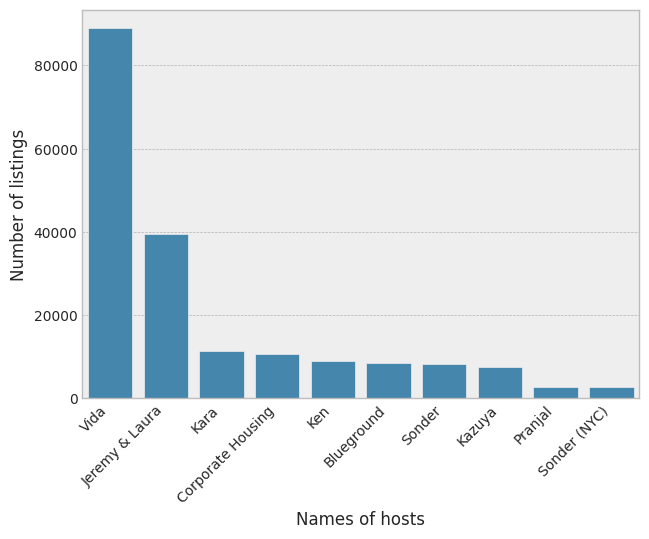

In [536]:
sns.barplot(x=top_hosts_name, y=top_hosts)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Names of hosts')
plt.ylabel('Number of listings');

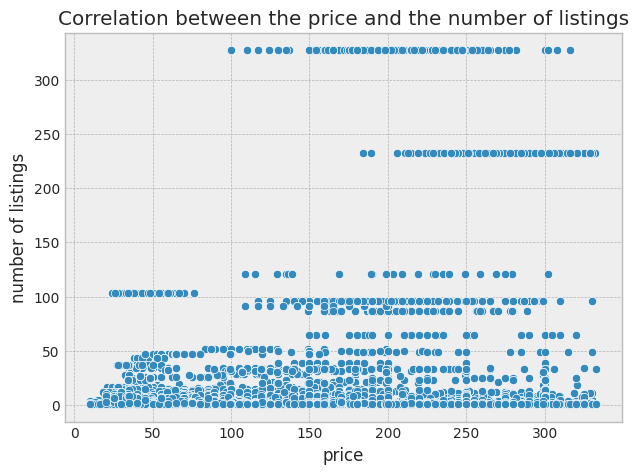

In [546]:
# Is there a correlation between the price and the number of listings (calculated_host_listings_count)?
sns.scatterplot(x=data['price'], y=data['calculated_host_listings_count'])
plt.title('Correlation between the price and the number of listings')
plt.ylabel('number of listings');

There is no visible correlation between these variables.

In [541]:
# How is the number of reviews distributed across different city districts?
print(data.groupby('neighbourhood_group').number_of_reviews.sum())

neighbourhood_group
Bronx             28078
Brooklyn         473999
Manhattan        426969
Queens           155603
Staten Island     11536
Name: number_of_reviews, dtype: int64


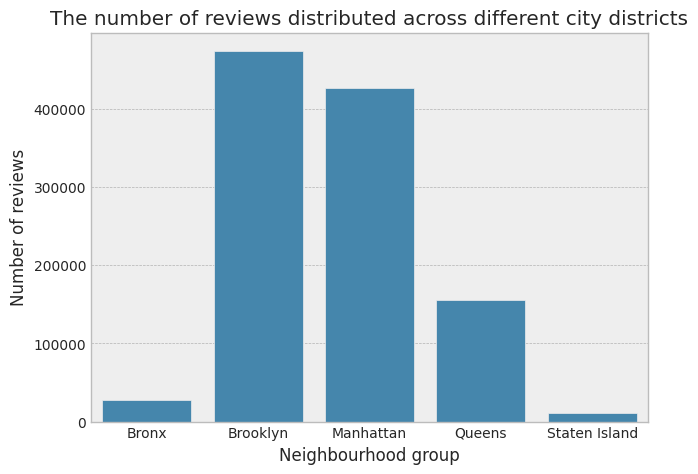

In [548]:
sns.barplot(data=data.groupby('neighbourhood_group').number_of_reviews.sum());
plt.title('The number of reviews distributed across different city districts')
plt.xlabel('Neighbourhood group')
plt.ylabel('Number of reviews');